# Data visualization


This notebook, prepared for MIT course 2s986 (Fall 2020), provides a data visualization example for both input and output of a regression model.

This notebook is inspired from accelerated materials workshop [demo](https://github.com/acceleratedmaterials/Astar_AMDworkshop_demo/tree/master/property_prediction) by Qianxiao Li


### Dataset

[Concrete Compressive Strength Data Set](<http://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength>)

The input values $X$ are columns 1-8, representing the various compositions of concrete. The target values $y$ are the compressive strengths in the last column, which is a function of the input compositions.

$$ y = f(X) $$

Our goal is to **approximate** this function $f(.)$ by some function $\hat{f}(\cdot,\theta)$, and then learn $\theta$ using data.


#### Note

More datasets can be found at [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html)

### Python Libraries

We use the `pandas`, `matplotlib`,`seaborn` libraries for visualization of datasets from a variety of formats (excel, csv, etc). 

We will also introduce `plotly` for interactive plots。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_excel('./data/Concrete_Data.xls', sheet_name='Sheet1')


In [2]:
df_cols=['Cement [kg/m3]', # get column names for indexing later
         'Blast Furnace Slag [kg/m3]',
         'Fly Ash [kg/m3]',
         'Water [kg/m3]',
         'Superplasticizer [kg/m3]',
         'Coarse Aggregate [kg/m3]',
         'Fine Aggregate [kg/m3]',
         'Age [day]',
         'Compressive Strength [MPa]']
df.columns = df_cols

### Visualize input data distribution as histogram

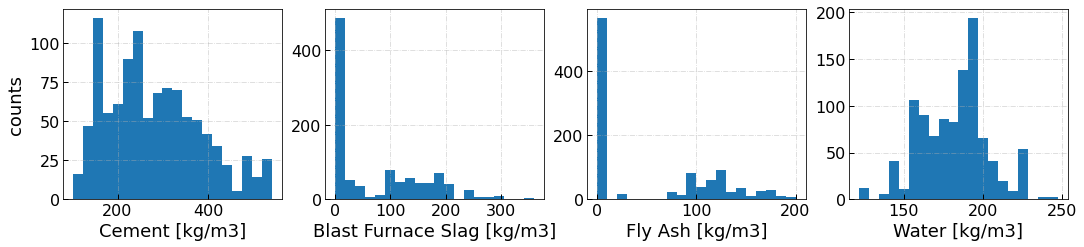

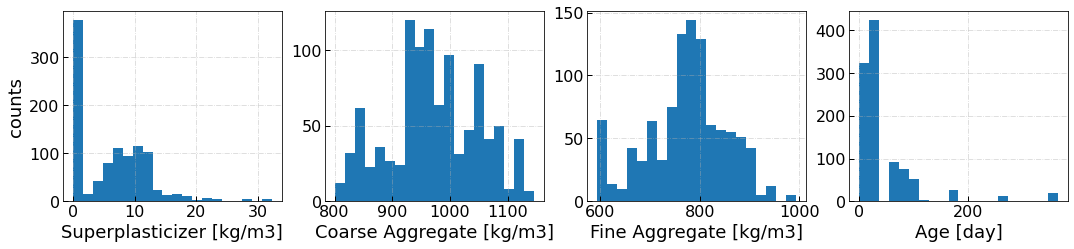

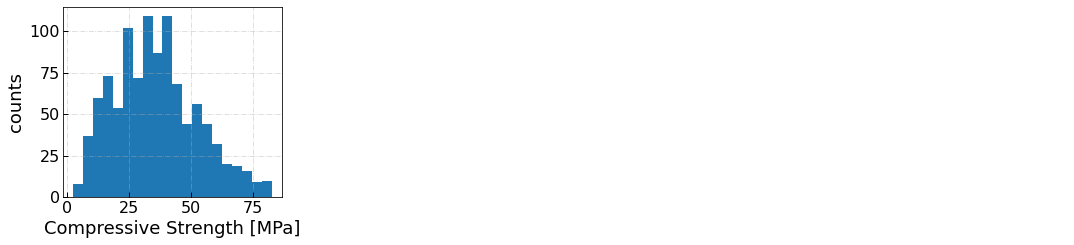

In [7]:
n_col = 4 # num of columns per row in the figure

for n in np.arange(0, 12, n_col):
    fig,axes = plt.subplots(1, n_col, figsize=(18, 3.5), sharey = False)
    fs = 20
    for i in np.arange(n_col):
        if n< len(df_cols):
            axes[i].hist(df.iloc[:,n], bins = 20)
            axes[i].set_xlabel(df_cols[n], fontsize = 18)
        else:
            axes[i].axis("off")
        n = n+1      
    axes[0].set_ylabel('counts', fontsize = 18)
    for i in range(len(axes)):
        axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
        axes[i].grid(True, linestyle='-.')
    plt.show()

### Visualize the marginalized dependence as scatter plot

The color is for variable Age [day] with red as the highest and blue as the lowest


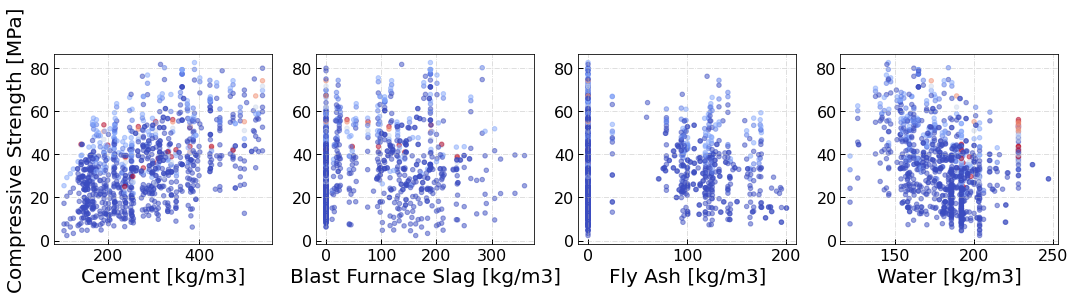

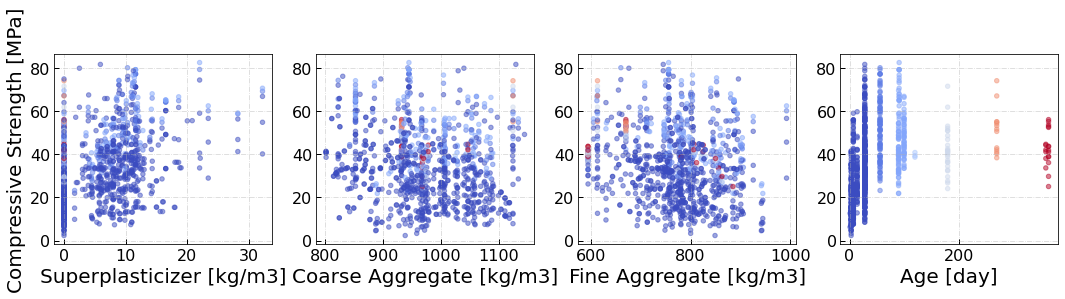

In [8]:
n_col = 4 # num of columns per row in the figure
y_indx = -1 #Compressive Strength [MPa] # Choose which column is the response variable 
color_indx = -2 #Age [days] # Choose which column is shown as the superimposed color
column_names = df.columns.values
fs = 20

cmap = plt.get_cmap('coolwarm', 10)
print("The color is for variable", column_names[color_indx], "with red as the highest and blue as the lowest")

for n in np.arange(0, 8, n_col):
        fig,axes = plt.subplots(1, n_col, figsize=(18, 3.5), sharey = False)
        for i in np.arange(n_col):
            #print(n)
            if n< len(column_names)-1:
                im = axes[i].scatter(df.iloc[:,n],df.iloc[:,y_indx], 
                                     c=df.iloc[:,color_indx], s = 20, cmap=cmap, alpha =0.5, edgecolors = 'face')
                axes[i].set_xlabel(column_names[n], fontsize = fs)
            else:
                axes[i].axis("off")
                #axes[i].set_title(sf_cols[n])
            n = n+1      
        axes[0].set_ylabel(column_names[y_indx], fontsize = fs)
        for i in range(len(axes)):
            axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
            axes[i].grid(True, linestyle='-.')
        plt.show()

### Correlation Matrix Visualized as Heatmap

In [9]:
df.corr(method='pearson').round(2)


Cement [kg/m3]  Blast Furnace Slag [kg/m3]  \
Cement [kg/m3]                        1.00                       -0.27   
Blast Furnace Slag [kg/m3]           -0.27                        1.00   
Fly Ash [kg/m3]                      -0.40                       -0.32   
Water [kg/m3]                        -0.08                        0.11   
Superplasticizer [kg/m3]              0.09                        0.04   
Coarse Aggregate [kg/m3]             -0.11                       -0.28   
Fine Aggregate [kg/m3]               -0.22                       -0.28   
Age [day]                             0.08                       -0.04   
Compressive Strength [MPa]            0.50                        0.14   

                            Fly Ash [kg/m3]  Water [kg/m3]  \
Cement [kg/m3]                        -0.40          -0.08   
Blast Furnace Slag [kg/m3]            -0.32           0.11   
Fly Ash [kg/m3]                        1.00          -0.26   
Water [kg/m3]                         -0.26           1.00   
Superplasticizer [kg/m3]               0.38          -0.66   
Coarse Aggregate [kg/m3]              -0.01          -0.18   
Fine Aggregate [kg/m3]                 0.08          -0.45   
Age [day]                             -0.15           0.28   
Compressive Strength [MPa]            -0.10          -0.29   

                            Superplasticizer [kg/m3]  \
Cement [kg/m3]                                  0.09   
Blast Furnace Slag [kg/m3]                      0.04   
Fly Ash [kg/m3]                                 0.38   
Water [kg/m3]                                  -0.66   
Superplasticizer [kg/m3]                        1.00   
Coarse Aggregate [kg/m3]                       -0.26   
Fine Aggregate [kg/m3]                          0.22   
Age [day]                                      -0.19   
Compressive Strength [MPa]                      0.37   

                            Coarse Aggregate [kg/m3]  Fine Aggregate [kg/m3]  \
Cement [kg/m3]                                 -0.11                   -0.22   
Blast Furnace Slag [kg/m3]                     -0.28                   -0.28   
Fly Ash [kg/m3]                                -0.01                    0.08   
Water [kg/m3]                                  -0.18                   -0.45   
Superplasticizer [kg/m3]                       -0.26                    0.22   
Coarse Aggregate [kg/m3]                        1.00                   -0.18   
Fine Aggregate [kg/m3]                         -0.18                    1.00   
Age [day]                                      -0.00                   -0.16   
Compressive Strength [MPa]                     -0.17                   -0.17   

                            Age [day]  Compressive Strength [MPa]  
Cement [kg/m3]                   0.08                        0.50  
Blast Furnace Slag [kg/m3]      -0.04                        0.14  
Fly Ash [kg/m3]                 -0.15                       -0.10  
Water [kg/m3]                    0.28                       -0.29  
Superplasticizer [kg/m3]        -0.19                        0.37  
Coarse Aggregate [kg/m3]        -0.00                       -0.17  
Fine Aggregate [kg/m3]          -0.16                       -0.17  
Age [day]                        1.00                        0.33  
Compressive Strength [MPa]       0.33                        1.00

#### Quick one-line plot

<AxesSubplot:>

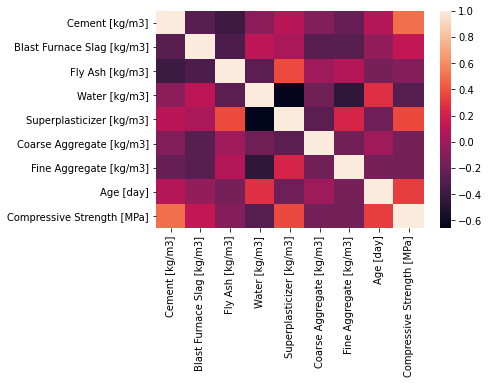

In [10]:
sns.heatmap(df.corr(method='pearson'))

#### More formating options of the heatmap

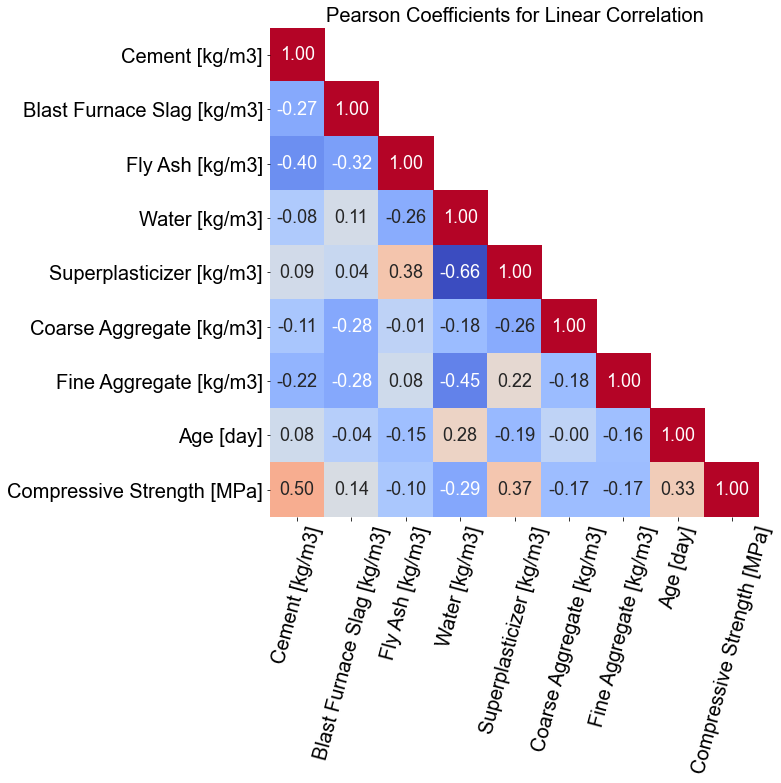

In [11]:
corr = df.corr(method='pearson')#'spearman'
corr.columns = df_cols
df_len = len(df_cols)
fs = 20


fig, ax=plt.subplots(figsize=(df_len,df_len))
sns.set(font_scale=1.5)
sns.set_style("ticks",{'xtick.direction': 'in', # set the style of the plot using seaborn
                       'ytick.direction':'in',
                       'xtick.top': False,'ytick.right': False})
mask = np.triu(np.ones_like(corr, dtype=np.bool),k=1)
cmap = plt.get_cmap('coolwarm')
sns.heatmap(corr, mask = mask, cbar_kws={"shrink": .2}, annot=True, fmt='.2f', 
            cmap=cmap, cbar=False, ax=ax, square=True)
ax.set_xlim(0, df_len)
ax.set_ylim(df_len, 0)
ax.set_title("Pearson Coefficients for Linear Correlation", fontsize = 20)
plt.xticks(rotation=75, fontsize = fs)
plt.yticks(rotation=0, fontsize = fs) 
plt.show()

### Pairwise scatter plot for input data

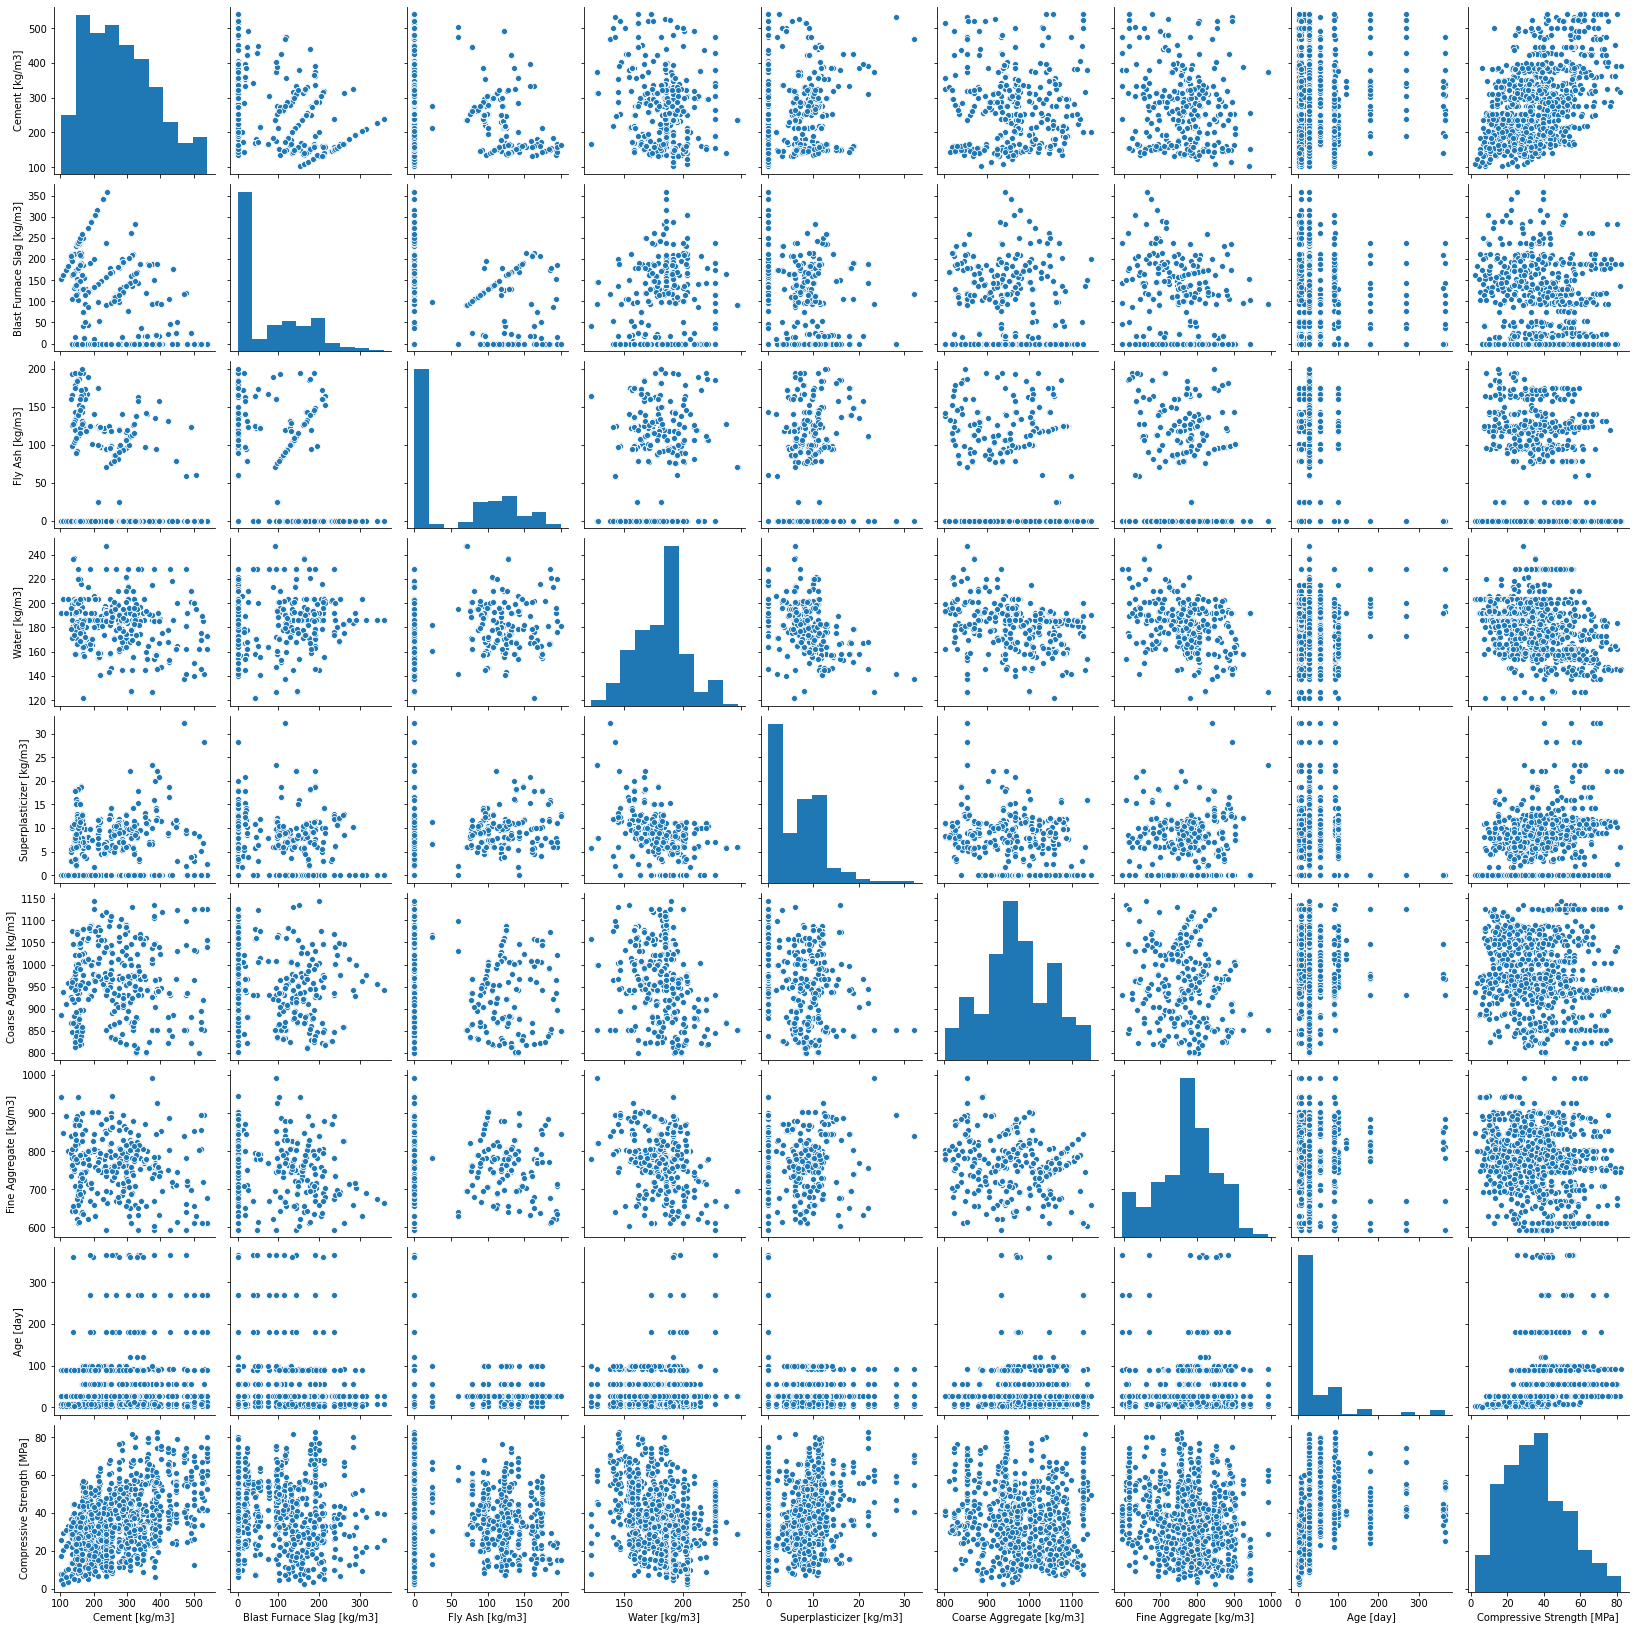

In [3]:
sns.pairplot(df)

### Now, let us build a machine leanring model  
- predict compressive strength based on the 7 input features

Split the dataset into training and test sets

In [4]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y= df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2 )

### linear regression
Let us try to fit the function using a simple linear regression model

In [5]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_hat_train = regressor.predict(X_train)  # Training set predictions
y_hat_test = regressor.predict(X_test)  # Test set predictions

We can use matplotlib to visualize the prediction vs ground truth

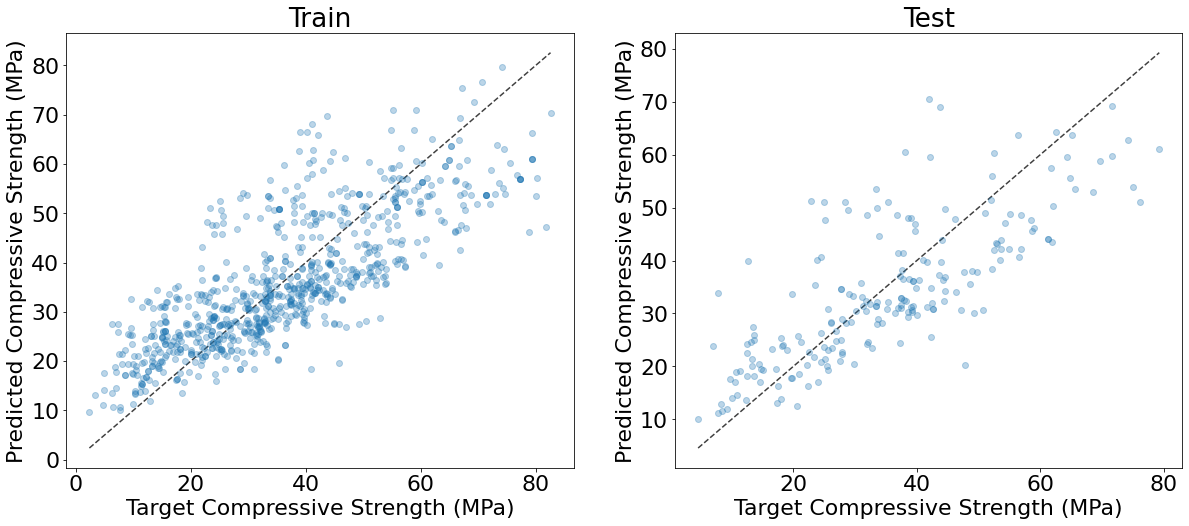

In [8]:
fig,ax = plt.subplots(1,2,figsize=(20,8))
#set font size
plt.rcParams.update({'font.size': 22})
#scatter plot
ax[0].scatter (y_train,y_hat_train,alpha=0.3)
ax[1].scatter (y_test,y_hat_test,alpha=0.3)
#line plot for the visual
ax[0].plot ((min(y_train),max(y_train)),(min(y_train),max(y_train)),'k--', alpha=0.75, zorder=0)
ax[1].plot ((min(y_test),max(y_test)),(min(y_test),max(y_test)),'k--', alpha=0.75, zorder=0)
#label and title
ax[0].set_xlabel ('Target Compressive Strength (MPa)')
ax[0].set_ylabel ('Predicted Compressive Strength (MPa)')
ax[1].set_xlabel ('Target Compressive Strength (MPa)')
ax[1].set_ylabel ('Predicted Compressive Strength (MPa)')
ax[0].set_title ('Train')
ax[1].set_title ('Test')
plt.show()

There are a lot of coding to generate the above plot. We can use function (`def`) to create a template for plotting

In [9]:
from sklearn.metrics import mean_squared_error
def plot_predictions(y, y_hat, labels):
 
  
    plt.rcParams.update({'font.size': 20, 'font.sans-serif':'arial'})
    y, y_hat, labels = list(
        map(
            lambda l: l if isinstance(l, list) else [l],
            [y, y_hat, labels]))
    color_list = ['blue', 'red']
    n_plots = len(y)
    y_min = min([min(z) for z in y])
    y_max = max([max(z) for z in y])
    lims = (y_min, y_max)
    fig, ax = plt.subplots(
        1, n_plots, figsize=(7*n_plots, 6),
        squeeze=False, sharex=True, sharey=True)
    for axis, target, prediction, label, color in zip(ax[0, :], y, y_hat, labels, color_list):
        # Scatter plot
        axis.scatter(target, prediction, alpha=0.3, c = color)

        # Title and labels
        rmse_value = np.sqrt(mean_squared_error(target, prediction))
        title = label + " (RMSE=%.3f)" % rmse_value
        axis.set_title(title)
        axis.set_xlabel('Target Compressive Strength (MPa)')
        axis.set_ylabel('Predicted Compressive Strength (MPa)')
        axis.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
        axis.yaxis.set_tick_params(which='both', labelleft=True)

    plt.subplots_adjust(wspace = 0.3)
    plt.show()


We can generate the same plot with one line of code

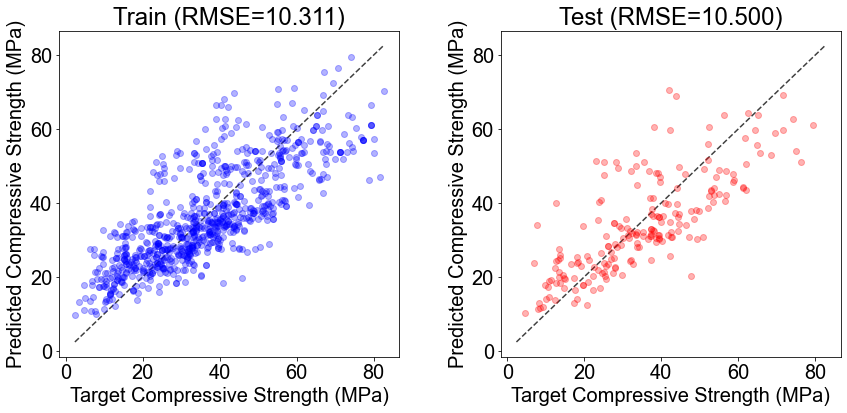

In [10]:
plot_predictions([y_train, y_test], [y_hat_train, y_hat_test],    labels=['Train', 'Test'])

### Polynomial regression
Let us fit the 8 input variable using a 3 order polynomial regression


In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree=3
regressor=make_pipeline(PolynomialFeatures(degree),LinearRegression())
regressor.fit(X,y)

regressor.fit(X_train, y_train)


y_hat_train = regressor.predict(X_train)  # Training set predictions
y_hat_test = regressor.predict(X_test)  # Test set predictions

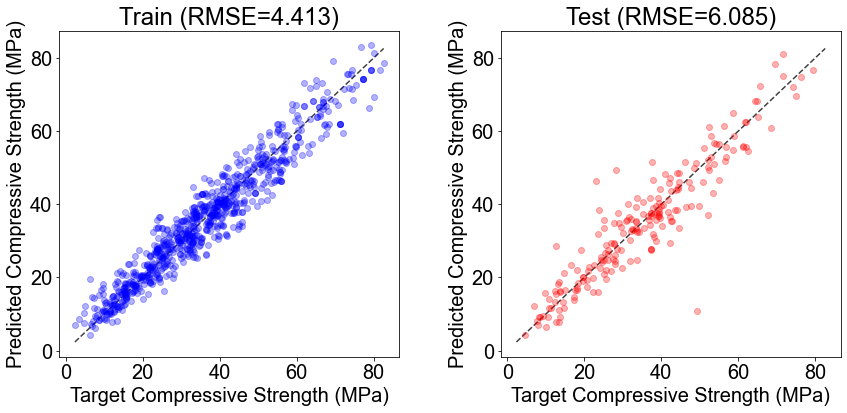

In [12]:
plot_predictions([y_train, y_test], [y_hat_train, y_hat_test],    labels=['Train', 'Test'])

### Input and output relationship visualization
So far we have visualized input and output separately. Now we take a look at approaches that visualize the response surface between input and output from 2D to 9D.

#### 3D 
We can use contour plot to visualize the relationship between 2D input and 1D output

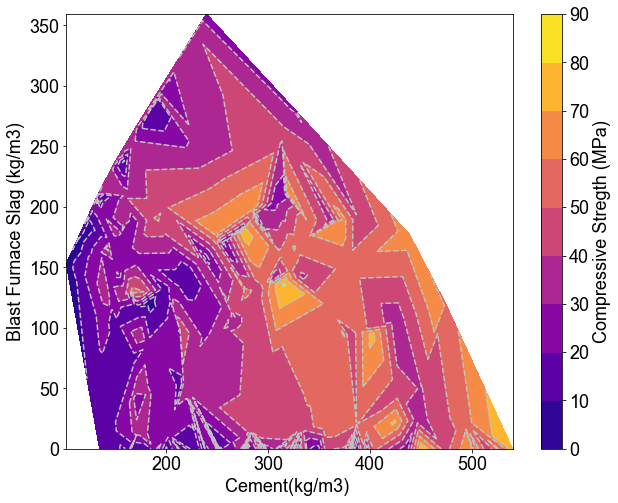

In [13]:
fig = plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 18})
plt.tricontour(X.iloc[:,0],X.iloc[:,1],y,linestyles='dashed',colors='silver')

plt.tricontourf(X.iloc[:,0],X.iloc[:,1],y,cmap='plasma')
plt.xlabel('Cement(kg/m3) ')
plt.ylabel('Blast Furnace Slag (kg/m3)')
cbar = plt.colorbar()

cbar.set_label('Compressive Stregth (MPa)')

#### >3D 
We can use parallel plot from plotly to show the input&output for higher dimensional space

In [14]:
import plotly.express as px

In [15]:
df.columns

Index(['Cement [kg/m3]', 'Blast Furnace Slag [kg/m3]', 'Fly Ash [kg/m3]',
       'Water [kg/m3]', 'Superplasticizer [kg/m3]', 'Coarse Aggregate [kg/m3]',
       'Fine Aggregate [kg/m3]', 'Age [day]', 'Compressive Strength [MPa]'],
      dtype='object')

In [16]:

fig = px.parallel_coordinates(df, color=df.columns[-1],
                              dimensions=df.columns[:3]
                              )
fig.show()

In [17]:
fig = px.parallel_coordinates(df, color=df.columns[-1],
                              dimensions=df.columns[:-1]
                              )
fig.show()

Response map visualization 